In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

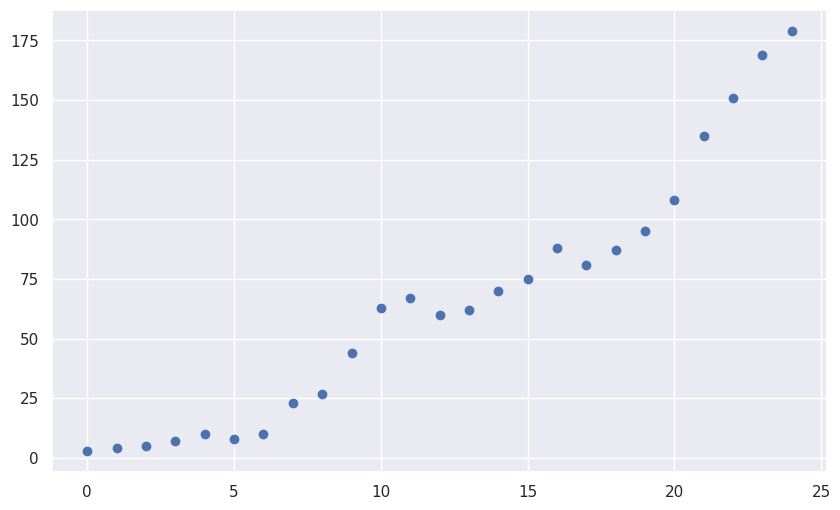

In [29]:
y = [3, 4, 5, 7, 10, 8, 10, 23, 27, 44, 63, 67,  60, 62, 70, 75, 88, 81,
     87, 95, 108, 135, 151, 169, 179]
x = np.arange(len(y))
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [30]:
# Características polinomiales
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()

In [31]:
# Generación de características nuevas
poly_features = poly.fit_transform(x.reshape(-1, 1))
poly_features.shape

(25, 3)

In [32]:
# Modelo lineal
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()

In [33]:
# Ajuste y predicción
poly_reg_model.fit(poly_features, y)
y_pred = poly_reg_model.predict(poly_features)

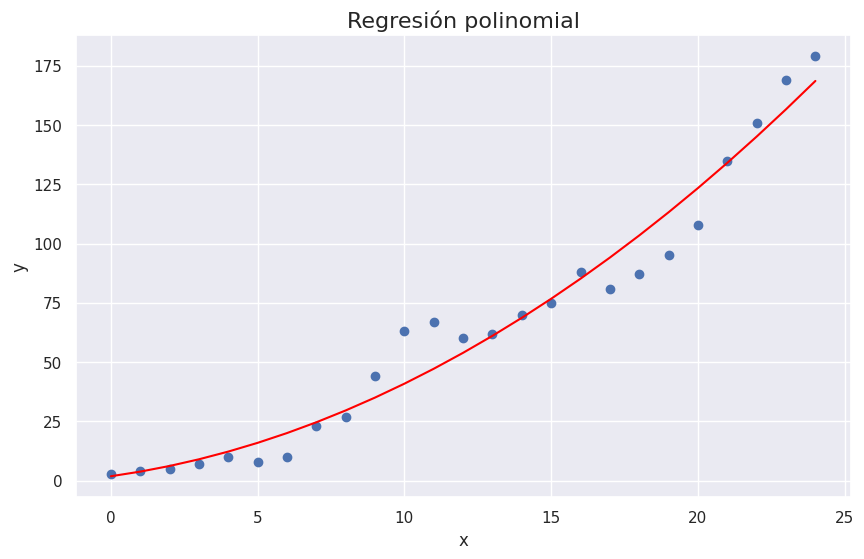

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.plot(x, y_pred, c="red")
plt.title('Regresión polinomial', size=16)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Determinar el grado del polinomio

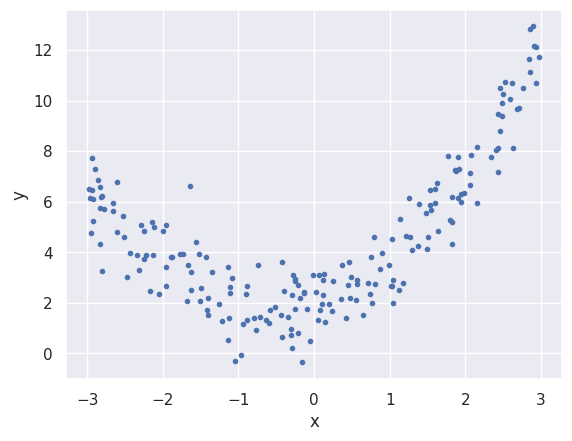

In [35]:
import numpy as np
import matplotlib.pyplot as plt
x = 6 * np.random.rand(200, 1) - 3
y = 0.8*x**2 + 0.9*x + 2 + np.random.randn(200, 1)
#ecuación -> y = 0.8x^2 + 0.9x + 2
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
sns.set_theme()

In [37]:
# conjunto de entrenamiento y pruebas
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2,
                                               random_state=2)

In [38]:
# modelo lineaal y su rendimiento
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('  R2 : ',r2_score(y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_pred)))

  R2 :  0.2452537084986599
RMSE :  2.426842880609888


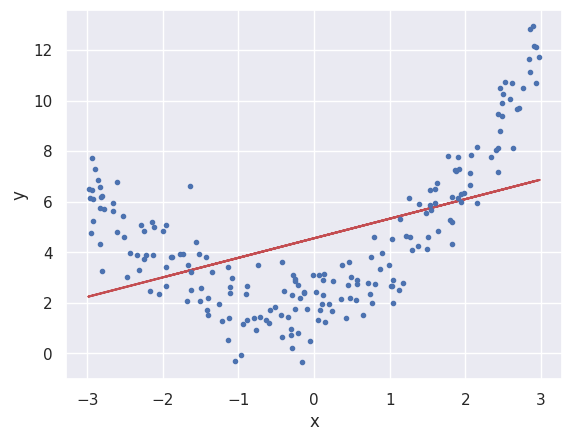

In [39]:
plt.plot(x_train, lr.predict(x_train), color='r')
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

  R2 :  0.8866571671851751
RMSE :  0.9404553851099071


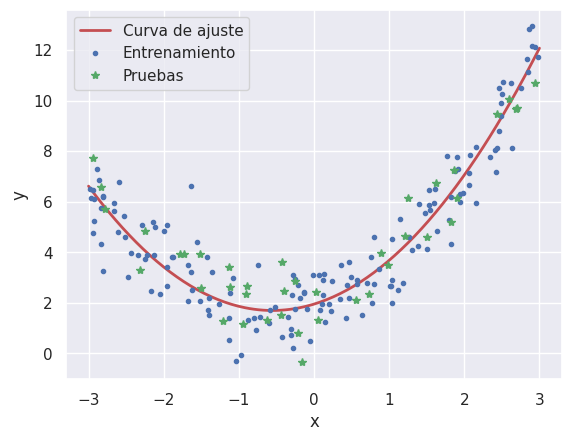

In [40]:
# Polinomio de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_poly, y_train)
y_pred = lr.predict(x_test_poly)
print('  R2 : ',r2_score(y_test, y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test, y_pred)))
# Visualización
x_new = np.linspace(-3, 3, 200).reshape(200, 1)
x_new_poly = poly.transform(x_new)
y_new_pred = lr.predict(x_new_poly)
plt.plot(x_new, y_new_pred, "r", linewidth=2, label='Curva de ajuste')
plt.plot(x_train, y_train, "b.",label='Entrenamiento')
plt.plot(x_test, y_test, "g*",label='Pruebas')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

In [41]:
# PolyReg múltiples características
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Generador de datos
np.random.seed(1)
x1 = np.absolute(np.random.randn(100, 1) * 10)
x2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x1**2 + 3*x2 + 2 + np.random.randn(100, 1)*20
#ecuación -> y = 2*x1^2 + 3x2 + 2

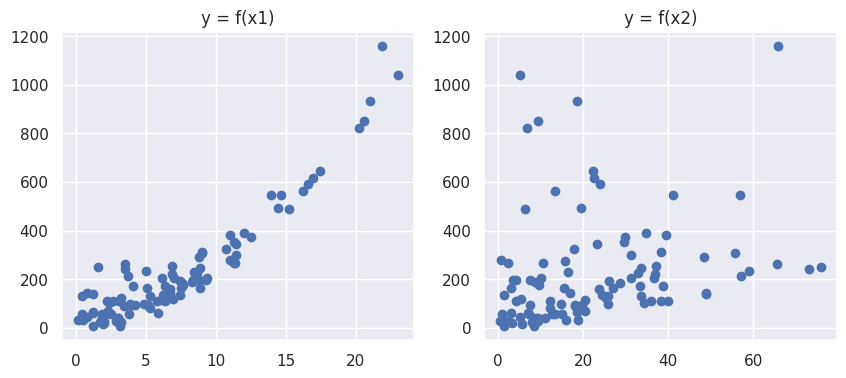

In [43]:
# Gráficas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x1, y)
axes[1].scatter(x2, y)
axes[0].set_title("y = f(x1)")
axes[1].set_title("y = f(x2)")
plt.show()

In [44]:
# DataFrame de los datos
df = pd.DataFrame({'x1':x1.reshape(100,), 'x2':x2.reshape(100,),
                   'y':y.reshape(100,)}, index=range(0,100))
df.head()

,x1,x2,y
0,16.243454,13.413857,561.923579
1,6.117564,36.735231,203.534988
2,5.281718,12.104749,82.861219
3,10.729686,17.807356,324.771961
4,8.654076,32.847355,223.689106


In [45]:
# Características polinomiales y conjuntos de entrenamiento/prueba
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
X, y = df[['x1', 'x2']], df['y']
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly_features = poly.fit_transform(X)
X_poly_features.shape

(100, 5)

In [46]:
# Entrenamiento y pruebas
X_train,X_test,y_train,y_test=train_test_split(X_poly_features, y,
                                               test_size=0.3, random_state=42)

In [47]:
# Modelo lineal
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()

In [48]:
# Ajuste, predicción y evaluación
poly_reg_model.fit(X_train, y_train)
y_pred = poly_reg_model.predict(X_test)
from sklearn.metrics import mean_squared_error
poly_reg_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
poly_reg_rmse

np.float64(20.937707839078783)

In [49]:
""" Para dos variables independientes se convierte en:
indep + a·x1 + b·x2 + c·x1^2+ d·x1·x2 + e·x2^2
# ecuacion -> y = 2*x1^2 + 3x2 + 2
con: indep = intercept
a = coefs[0]
...
e = coefs[4]
"""
print(poly_reg_model.intercept_, poly_reg_model.coef_)

14.123436038979236 [0.61945509 1.9140045  1.89905813 0.0207338  0.01300394]


In [50]:
# Vs modelo lineal puro
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_pred = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_pred))
lin_reg_rmse

np.float64(20.937707839078783)